In [1]:
import pysam
import numpy as np
import cPickle as pickle

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from pyUMI import umi_stats as stats
from pyUMI import multimap_resolve_lib as mr

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

In [4]:
from pyUMI import r2_multimap_solver as rs2
from pyUMI import r1_multimap_solver as rs1

In [5]:
st = pysam.AlignmentFile("/data/UMI/data/MUS/sample_AAAACT.bam","rb")

In [6]:
%%time
mm_hashtable = mr.build_multimapping_hashtable(st, region='all')
uniq_hashtable,uniq_map = mr.build_uniques_associations(st, cell_barcodes=["AAAACT"])

CPU times: user 1min 33s, sys: 1.41 s, total: 1min 34s
Wall time: 1min 34s


In [7]:
rg = rs2.multimap_multiregion_generator(mm_hashtable,1)

In [8]:
rg2 = rs2.multimap_multiregion_generator(mm_hashtable, 1, no_gene=False)

---------------------

### Rank2 Multimap Solver : resolving multi_mapped alignments by coordinates

In [9]:
a,b = rs2.rank2_multimap_solver(rg, uniq_hashtable, uniq_map, window=15000,report=True)
    

INFO:pyUMI.r2_multimap_solver:	Generator for non-gene-tagged multi_mapped reads with at least 2 distinct reference names.
INFO:pyUMI.r2_multimap_solver:	Finished mapping multi_mapped reads using the vicinity threshold of 15000 bps.
INFO:pyUMI.r2_multimap_solver:	Total number of non_gene-tagged multi_mapped reads :                        167,981
INFO:pyUMI.r2_multimap_solver:	Number of most likely assignments to a unique genomic reference :             8,288
INFO:pyUMI.r2_multimap_solver:	Total number of resolved alignments :                                        26,050


In [10]:
rg = rs2.multimap_multiregion_generator(mm_hashtable,1)
dist = rs2.r2_solvers_distance_dist(rg, uniq_hashtable, uniq_map, absolute=False)

INFO:pyUMI.r2_multimap_solver:	Generator for non-gene-tagged multi_mapped reads with at least 2 distinct reference names.


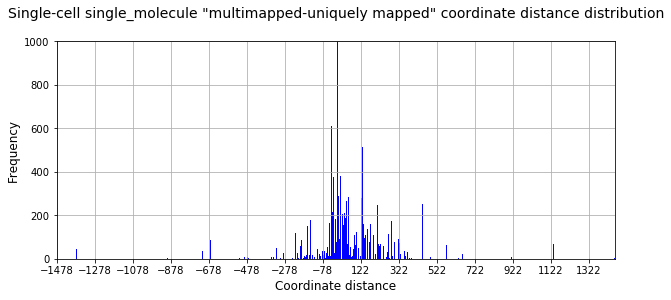

In [31]:
rs2.draw_pie(dist,'Single-cell single_molecule "multimapped-uniquely mapped" coordinate distance distribution',absolute=True,xlabel='Coordinate distance',ylabel='Frequency', log_scale=False)

In [12]:
c,d = rs2.rank2_multimap_solver(rg2, uniq_hashtable, uniq_map, window=15000,report=True)

INFO:pyUMI.r2_multimap_solver:	Generator for non-gene-tagged multi_mapped reads with at least 2 distinct reference names.
INFO:pyUMI.r2_multimap_solver:	Finished mapping multi_mapped reads using the vicinity threshold of 15000 bps.
INFO:pyUMI.r2_multimap_solver:	Total number of non_gene-tagged multi_mapped reads :                      2,195,270
INFO:pyUMI.r2_multimap_solver:	Number of most likely assignments to a unique genomic reference :            28,864
INFO:pyUMI.r2_multimap_solver:	Total number of resolved alignments :                                       178,414


In [13]:
rg2 = rs2.multimap_multiregion_generator(mm_hashtable,1, no_gene=False)
dist2 = rs2.r2_solvers_distance_dist(rg2, uniq_hashtable, uniq_map, absolute=False)

INFO:pyUMI.r2_multimap_solver:	Generator for non-gene-tagged multi_mapped reads with at least 2 distinct reference names.


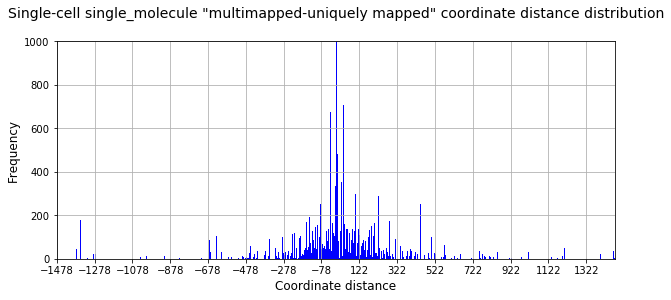

In [30]:
rs2.draw_pie(dist2,'Single-cell single_molecule "multimapped-uniquely mapped" coordinate distance distribution',absolute=True,xlabel='Coordinate distance',ylabel='Frequency', log_scale=False)

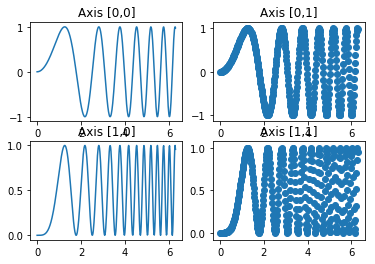

In [8]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]])#, visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]])#, visible=False)

plt.show()

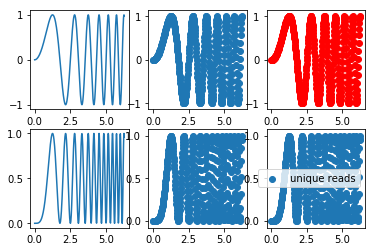

In [31]:
f, axarr = plt.subplots(2, 3)
axarr[0, 0].plot(x, y)
axarr[0, 1].scatter(x, y)
axarr[0, 2].scatter(x, y, color='r')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 2].scatter(x, y ** 2)
#plt.legend(['unique reads','multi reads'])
plt.show()

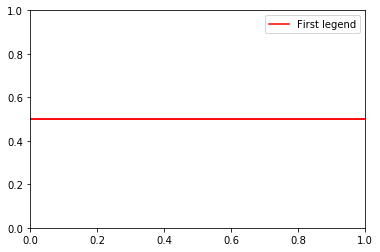

In [30]:
#h = 
plt.legend([plt.axhline(y=0.5, color='r', linestyle='-')],['First legend'])
plt.show()